<a href="https://colab.research.google.com/github/GokulAnnam/ML-DL/blob/main/practiceDL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/2
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 6270939136.0000
Epoch 2/2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - loss: 6270938624.0000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
7430292447.734253


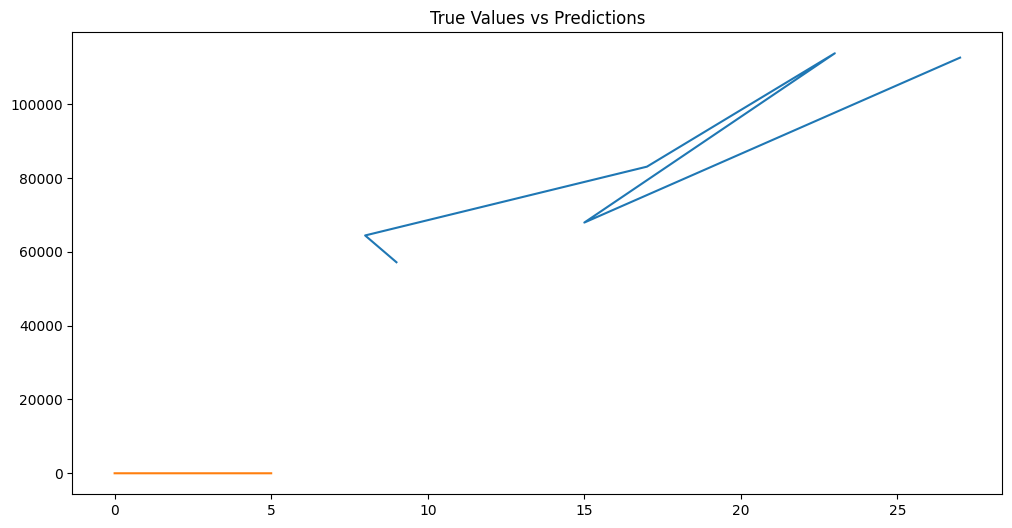

In [ ]:
#week 1- linear regression single variable, week 2 also similar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from sklearn.model_selection import train_test_split

file_path = "/content/Salary_Data_linear_single_variable.csv" #idi oka bokkalo dataset, dont use this in exams
df = pd.read_csv(file_path)

#new dataframes for training purpose
xdf = df[['YearsExperience']]  #storing independent variable in xdf, for multiple variable linear regression we keep multiple variables here
ydf = df['Salary'] #storing dependent variable in ydf

#test train split
xdf_train , xdf_test, ydf_train, ydf_test = train_test_split(xdf,ydf,test_size = 0.2, random_state=42)

#model train
model = Sequential()  #importing model
model.add(Dense(1,activation='linear', input_dim = 1)) #getting model ready with required number of neurons and layers
#in multiple variable, mention number of input variables here in input_dim
model.compile(optimizer = 'adam',loss = 'mean_squared_error') #optimizer is imp as it tells how to update weights and it needs to calculate loss using any loss function so that it tries to reduce that loss in future
model.fit(xdf_train,ydf_train, epochs = 2)

#predict test dataset output and find mse to know how far our model is correct
y_pred = model.predict(xdf_test)
mse = mean_squared_error(y_pred, ydf_test)
print(mse)

#plot graph between predicted and actual target variables
plt.figure(figsize=(12, 6))
plt.plot(ydf_test, label='True Values')
plt.plot(y_pred, label='Predictions')
plt.title('True Values vs Predictions')
plt.show()




In [ ]:
#week 4, gtts is google text to speech
from gtts import gTTS
from IPython.display import Audio

text_input = "రేపు పరీక్ష అంటా మీ పైనే భారం వేస్తున్నాం"
speech = gTTS(text = text_input, lang = 'te')
speech.save('output.mp3')
Audio('output.mp3')


In [ ]:
#week 3 speech to text
import speech_recognition as sr
audio_path = "/content/harvard.wav"

rec = sr.Recognizer()

with sr.AudioFile(audio_path) as source:
  audio_data = rec.record(source) #reading audio file

output = rec.recognize_google(audio_data) #converting audiofile into text
print(output)


the stale smell of old beer lingers it takes heat to bring out the odor a cold dip restores health and zest a salt pickle taste fine with ham tacos al pastor are my favorite a zestful food is the hot cross bun


In [ ]:
!pip install gtts

In [ ]:
#week 5
import cv2
from IPython.display import Image, display
import os

def FrameCapture(path, output_folder="/content/frames", frame_limit=5):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    vidObj = cv2.VideoCapture(path)
    count = 0
    success = True

    while success and count < frame_limit:
        success, image = vidObj.read()
        if success:
            frame_path = os.path.join(output_folder, f"frame{count}.jpg")
            cv2.imwrite(frame_path, image)
            display(Image(frame_path))
            count += 1

if __name__ == '__main__':
    FrameCapture("")

In [4]:
#cnn character recognition
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras import layers
from keras import models
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

''' 60000 is batch size(number of images) in 28x28 pixel size. 1 is dimension for grayscale.
we are converting the integers (0-255) to float as cnn work better on float, and /255 is to normalise all to between (0,1)'''

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

''' to_categorical converts class labels to one-hot encoded vectors. i.e here from integres(0-9) to binary vectors
of length 10. example for 3 is [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]'''

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape = (28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D (64,(3,3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64,activation = 'relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation = 'softmax')

])

'''1st layer we use 3x3 filter on 28x28, as output we get 26x26 with 32 filters
2nd layer is max pooling of 2x2. so for every 2x2 block we select max value, which reduces size of input, here output we get is 13x13
1st conv layer extracts basic features, next layers extracts more complex features. rule is for extracting general features
(1st layer) we keep less filters. furthur layers we keep more filters(usually double)

next layer is flatten, which converts 3x3x64(after last conv) becomes 576.
'''

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=2, batch_size=64,validation_split=0.2)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'\nTest accuracy: {test_acc:.4f}')
predictions = model.predict(test_images)




11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/2
750/750 ━━━━━━━━━━━━━━━━━━━━ 44s 55ms/step - accuracy: 0.7467 - loss: 0.7660 - val_accuracy: 0.9811 - val_loss: 0.0671
Epoch 2/2
750/750 ━━━━━━━━━━━━━━━━━━━━ 86s 61ms/step - accuracy: 0.9647 - loss: 0.1278 - val_accuracy: 0.9852 - val_loss: 0.0492
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9844 - loss: 0.0533

Test accuracy: 0.9870
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


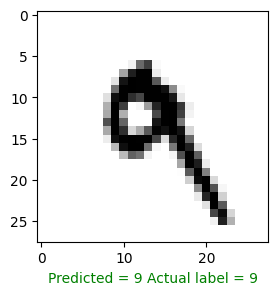

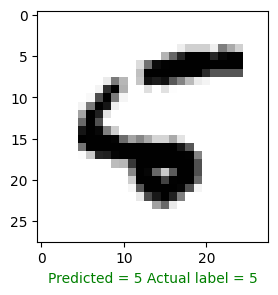

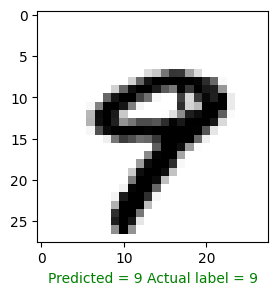

In [ ]:
# Prediction from test labels
for i in range(7, 10):
    plt.figure(figsize=(3, 3))
    plt.imshow(test_images[i].reshape(28, 28), cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])  # Get the predicted class index
    true_label = np.argmax(test_labels[i])  # Convert one-hot encoded label to integer
    color = 'green' if predicted_label == true_label else 'red'
    plt.xlabel(f'Predicted = {predicted_label} Actual label = {true_label}', color=color)
    plt.show()


In [5]:
#logic gates
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0], [1], [1], [0]])

model = Sequential()
model.add(Dense(2, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X, Y, epochs=1000, verbose=0)
predictions = model.predict(X)

print("Predictions for XOR inputs:")
for i, (x, pred) in enumerate(zip(X, predictions)):
    print(f"Input: {x}, Predicted Output: {round(pred[0])}, Expected Output: {Y[i][0]}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Predictions for XOR inputs:
Input: [0 0], Predicted Output: 0, Expected Output: 0
Input: [0 1], Predicted Output: 0, Expected Output: 1
Input: [1 0], Predicted Output: 1, Expected Output: 1
Input: [1 1], Predicted Output: 0, Expected Output: 0



image 1/1 /content/Screenshot (11).png: 384x640 1 person, 311.9ms
Speed: 14.2ms preprocess, 311.9ms inference, 28.7ms postprocess per image at shape (1, 3, 384, 640)


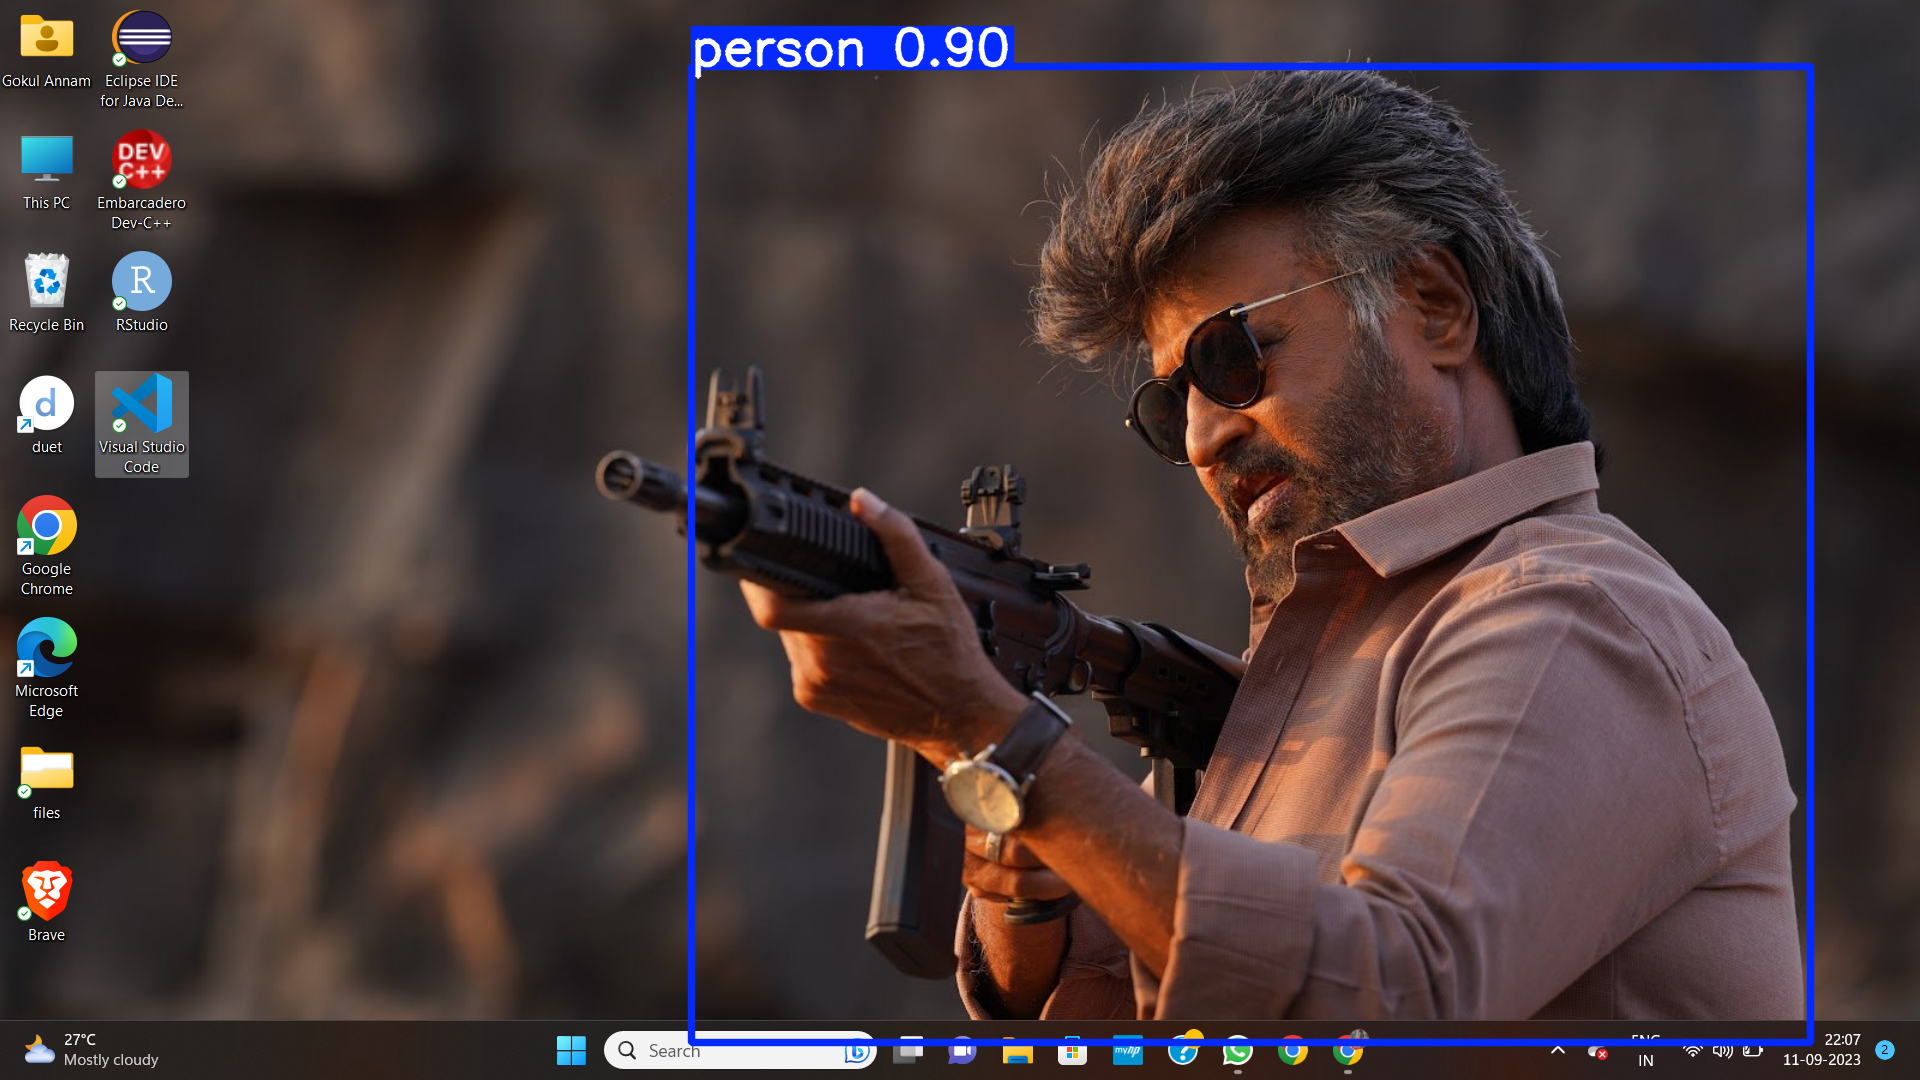

In [3]:
#yolo
#!pip install ultralytics
from ultralytics import YOLO

# Load YOLO model
model = YOLO("yolov8n.pt")

# Load image and perform detection
image_path = '/content/Screenshot (11).png'
results = model(image_path)  # This returns a list of results

# Display the results
results[0].show()  # Call .show() on the first result

In [ ]:
#rnn next word
import math
import random

# Tanh activation function
def tanh(x):
    return (math.exp(x) - math.exp(-x)) / (math.exp(x) + math.exp(-x))

# Simple RNN Cell
class RNNCell:
    def _init_(self, input_size, hidden_size):
        self.input_size = input_size
        self.hidden_size = hidden_size

        # Randomly initialize weights
        self.Wx = [random.uniform(-1, 1) for _ in range(input_size)]
        self.Wh = [random.uniform(-1, 1) for _ in range(hidden_size)]
        self.b = random.uniform(-1, 1)  # Bias term

        self.hidden_state = 0

    def forward(self, x):
        # Compute new hidden state
        self.hidden_state = tanh(sum(w * x for w in self.Wx) + sum(w * self.hidden_state for w in self.Wh) + self.b)
        return self.hidden_state

# Example usage with improved word embedding (spread out values for better differentiation)
word_embeddings = {"hello": 0.5, "all": 0.1}

rnn = RNNCell(input_size=1, hidden_size=1)

# Predict next word
input_word = "hello"
output = rnn.forward(word_embeddings[input_word])
predicted_word = min(word_embeddings.keys(), key=lambda k: abs(word_embeddings[k] - output))

print(f"Input Word: {input_word}")
print(f"Predicted Next Word: {predicted_word}")


In [ ]:
#image segmentation final
import tensorflow as tf
import numpy as np
from PIL import Image
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Encoder Block
def encoder_block(inputs, num_filters):
    x = tf.keras.layers.Conv2D(num_filters, 3, padding="same")(inputs)
    x = tf.keras.layers.Activation("relu")(x)
    x = tf.keras.layers.Conv2D(num_filters, 3, padding="same")(x)
    x = tf.keras.layers.Activation("relu")(x)
    x = tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2)(x)
    return x

def decoder_block(inputs, skip_features, num_filters):
    x = tf.keras.layers.Conv2DTranspose(num_filters, (2, 2), strides=2, padding="same")(inputs)

    # Use a Keras layer to resize the skip connection properly
    skip_features_resized = tf.keras.layers.Resizing(x.shape[1], x.shape[2])(skip_features)

    x = tf.keras.layers.Concatenate()([x, skip_features_resized])

    x = tf.keras.layers.Conv2D(num_filters, 3, padding="same")(x)
    x = tf.keras.layers.Activation("relu")(x)
    x = tf.keras.layers.Conv2D(num_filters, 3, padding="same")(x)
    x = tf.keras.layers.Activation("relu")(x)

    return x


# U-Net Model
def unet_model(input_shape=(256, 256, 3), num_classes=1):
    inputs = tf.keras.layers.Input(input_shape)

    # Encoder
    s1 = encoder_block(inputs, 64)
    s2 = encoder_block(s1, 128)
    s3 = encoder_block(s2, 256)
    s4 = encoder_block(s3, 512)

    # Bottleneck
    b1 = tf.keras.layers.Conv2D(1024, 3, padding="same")(s4)
    b1 = tf.keras.layers.Activation("relu")(b1)
    b1 = tf.keras.layers.Conv2D(1024, 3, padding="same")(b1)
    b1 = tf.keras.layers.Activation("relu")(b1)

    # Decoder
    d1 = decoder_block(b1, s4, 512)
    d2 = decoder_block(d1, s3, 256)
    d3 = decoder_block(d2, s2, 128)
    d4 = decoder_block(d3, s1, 64)

    # Output Layer
    activation = "softmax" if num_classes > 1 else "sigmoid"
    outputs = tf.keras.layers.Conv2D(num_classes, 1, padding="same", activation=activation)(d4)

    model = tf.keras.models.Model(inputs, outputs, name="U-Net")
    return model

# Initialize Model
model = unet_model(input_shape=(256, 256, 3), num_classes=2)
model.summary()

# Load and Preprocess Image
img_path = '/content/Screenshot 2025-03-24 084112.png'  # Store the path as a string
img = Image.open(img_path)  # Open the image using PIL.Image
img = img.resize((256, 256))  # Resized to match model input
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array[:, :, :3], axis=0) / 255.0

# Predict
predictions = model.predict(img_array)

# Post-processing
predictions = np.argmax(predictions, axis=-1)[0]  # Remove batch dim
predictions = Image.fromarray(np.uint8(predictions * 255)).resize((img.width, img.height))
predictions.save("predicted_image.jpg")
predictions.show()

Model: "U-Net"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 256, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_76 (Conv2D)        │ (None, 256, 256, 64)   │          1,792 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_72             │ (None, 256, 256, 64)   │              0 │ conv2d_76[0][0]        │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_77 (Conv2D)        │ (None, 256, 256, 64)   │         36,928 │ activation_72[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_73             │ (None, 256, 256, 64)   │              0 │ conv2d_77[0][0]        │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_16          │ (None, 128, 128, 64)   │              0 │ activation_73[0][0]    │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_78 (Conv2D)        │ (None, 128, 128, 128)  │         73,856 │ max_pooling2d_16[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_74             │ (None, 128, 128, 128)  │              0 │ conv2d_78[0][0]        │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_79 (Conv2D)        │ (None, 128, 128, 128)  │        147,584 │ activation_74[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_75             │ (None, 128, 128, 128)  │              0 │ conv2d_79[0][0]        │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_17          │ (None, 64, 64, 128)    │              0 │ activation_75[0][0]    │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_80 (Conv2D)        │ (None, 64, 64, 256)    │        295,168 │ max_pooling2d_17[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_76             │ (None, 64, 64, 256)    │              0 │ conv2d_80[0][0]        │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_81 (Conv2D)        │ (None, 64, 64, 256)    │        590,080 │ activation_76[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_77             │ (None, 64, 64, 256)    │              0 │ conv2d_81[0][0]        │
│ (Activation)              │                        │                │                        │
├──────────────────────

 Total params: 31,031,810 (118.38 MB)

 Trainable params: 31,031,810 (118.38 MB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [ ]:
#LSTM
import math
import random

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

# Tanh activation function
def tanh(x):
    return (math.exp(x) - math.exp(-x)) / (math.exp(x) + math.exp(-x))

# Simple LSTM Cell
class LSTMCell:
    def __init__(self, input_size, hidden_size):
        self.input_size = input_size
        self.hidden_size = hidden_size

        # Randomly initialize weights (for simplicity)
        self.Wf = [random.uniform(-1, 1) for _ in range(input_size + hidden_size)]
        self.Wi = [random.uniform(-1, 1) for _ in range(input_size + hidden_size)]
        self.Wo = [random.uniform(-1, 1) for _ in range(input_size + hidden_size)]
        self.Wc = [random.uniform(-1, 1) for _ in range(input_size + hidden_size)]

        self.hidden_state = 0
        self.cell_state = 0

    def forward(self, x):
        # Combining input and hidden state
        combined = x + self.hidden_state

        # Forget gate
        ft = sigmoid(sum(w * combined for w in self.Wf))

        # Input gate
        it = sigmoid(sum(w * combined for w in self.Wi))
        ct_hat = tanh(sum(w * combined for w in self.Wc))

        # Cell state update
        self.cell_state = ft * self.cell_state + it * ct_hat

        # Output gate
        ot = sigmoid(sum(w * combined for w in self.Wo))
        self.hidden_state = ot * tanh(self.cell_state)

        return self.hidden_state

# Example usage with hardcoded word embedding (just numbers)
word_embeddings = {"hello": 0.11, "all": 0.11, "how": 0.4, "are": 0.4, "you": 0.5}

lstm = LSTMCell(input_size=1, hidden_size=1)

# Predict next word
input_word = "are"
output = lstm.forward(word_embeddings[input_word])
predicted_word = min(word_embeddings.keys(), key=lambda k: abs(word_embeddings[k] - output))

print(f"Input Word: {input_word}")
print(f"Predicted Next Word: {predicted_word}")

Input Word: are
Predicted Next Word: hello


In [ ]:
# 12 rnn character recognition
import os
os.environ["TF_ENABLE_ONEDNN_OPTS"] = "0"
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist # type: ignore
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, LSTM, TimeDistributed, Reshape
import numpy as np

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize images
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = to_categorical(y_train), to_categorical(y_test)



# RNN Model
rnn_model = Sequential([
    Reshape((28, 28), input_shape=(28, 28)),
    LSTM(128, return_sequences=True),
    LSTM(64),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

rnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
rnn_model.fit(x_train, y_train, epochs=2, batch_size=64, validation_data=(x_test, y_test))

# Evaluate models
rnn_acc = rnn_model.evaluate(x_test, y_test, verbose=0)[1]

# Make predictions
predictions = rnn_model.predict(x_test)

# Plot some test images with predictions
for i in range(3, 6):
    plt.figure(figsize=(3, 3))
    plt.imshow(x_test[i], cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions[i])
    true_label = np.argmax(y_test[i])

    color = 'green' if predicted_label == true_label else 'red'
    plt.xlabel(f'Predicted: {predicted_label} | Actual: {true_label}', color=color)
    plt.show()


print(f'RNN Accuracy: {rnn_acc * 100:.2f}%')